# Статистика, прикладной поток
## Практическое задание

В данном задании вы изучите свойства метода Монте-Карло, сравнив его с методом прямоугольков. Также с помощью метода Монте-Карло вы решите задачу, которая возникает при составлении проекта по разработке нефтяного месторождения. Знания физики или экономики не требуются.

**Правила:**

* Дедлайн **26 сентября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 1 балл
* Задача 2 - 10 баллов
* Задача 3 - 10 баллов
* Задача 4 - 5 баллов
* Задача 5 - 20 баллов

Все задачи имеют тип **O3**. Подробнее см. в правилах выставления оценки.

**Задача 1.** Найдите книгу Савельев В. "Статистика и котики" и прочитайте главы 1 и 2. Какие выводы можно сделать?

**Вывод:** С помощью мер центральной тенденции(медиана, мода, среднее) мы можем узнать как выглядят типичные данные, а с помощью мер изменчивости(межквартильный размах, дисперсия, стандартное отклонение)  можно узнать разброс в данных. В зависимости от ситуации, выбираются различные меры центр. тенденции и меры изменчивости, и совместно они используются для описания группы данных.

Для того, чтобы наглядно просмотреть, как выглядят данные, прибегают в различным средствам визуализации данных(таблицы частот, диаграммы, боксплот). Кроме того, с помощью средств визуализации можно при неправильной интерпретации легко исказить представление о данных, чем часто пользуются, чтобы придумать какие либо тенденции в данных, где их на самом  деле нет. Самые распространенные способы - испольщование процентов вместо абсолютных величин, сдвиги шкалы, сокрытие данных, изменение масштабов и т.д.

**Задача 2.** Реализуйте метод Монте-Карло и метод прямоугольников численного интегрирования функции. Реализация должна уметь вычислять интеграл вида:
$$ \int\limits_{l_1}^{h_1} ... \int\limits_{l_d}^{h_d} f(x_1, ... , x_d) dx_1 ... dx_d $$

*Детали реализации*: на вход функции подаются векторы $l = (l_1, ... , l_d)$ и $h = (h_1, ... ,h_d)$, число $n$ -- максимальное допустимое число вызовов функции $f$ (если вы не делаете лишних вызовов, оно равно числу точек-центров отрезков, прямоугольников, параллелипипедов, и т.д. в многомерных случаях). Использование циклов, кроме циклов по числу интегралов $d$, **наказуемо**. Используйте функции `numpy.meshgrid` и `numpy.vectorize` для быстрой скорости работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

import time

Пример использования <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html"> `numpy.vectorize`</a>.

In [4]:
def vector_function(x):
    """Получает на вход вектор некоторой длины n, возвращает число.
    Сигнатуру можно записать как (n)->()"""
    return x.sum()

f = np.vectorize(vector_function, signature="(n)->()")
arg = np.arange(10).reshape(-1, 2)
arg

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [5]:
f(arg)  # вычисляет суммы по строкам

array([ 1,  5,  9, 13, 17])

Пример использования <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html">`numpy.meshgrid`</a>. Как всегда, настоятельно советуем читать документацию.

In [6]:
# координаты точек на некоторой координатной оси
linspace_x = [1, 2, 3]  
linspace_y = [-1, -2, -3]  

# возвращает матрицы с координатами сетки,
# задаваемой проекциями точек на оси координат
X, Y = np.meshgrid(linspace_x, linspace_y)

# преобразуем исходный формат к вектору точек
np.stack([X, Y]).reshape(2, -1).T

array([[ 1, -1],
       [ 2, -1],
       [ 3, -1],
       [ 1, -2],
       [ 2, -2],
       [ 3, -2],
       [ 1, -3],
       [ 2, -3],
       [ 3, -3]])

In [7]:
multi_unif_rvs = np.vectorize(lambda loc, scale, size: sps.uniform(loc, scale).rvs(size), 
                                                      signature='(),(),()->(m)')

In [8]:
multi_unif_rvs([1, 2], [1, 2], 3).T.mean()

1.8761601834046717

In [9]:
class Integrator: 
    @staticmethod
    def integrate(f, low, high, n, method="rectangle"):
        """Вычисление интеграла.
        f - функция многих переменных, на вход принимает вектор;
        low - нижние границы (в том же порядке, в котором 
                              функция принимает аргументы);
        high - верхние границы (аналогично);
        n - максимальное число вызовов функции f;
        method - метод ("rectangle" или "monte_carlo", 
                            см. Integrator.methods);
        """
        
        assert len(low) == len(high)
        low, high = map(np.array, [low, high])
        n = int(n)

        return Integrator.methods[method](f, low, high, n)
    
    def integrate_monte_carlo(f, low, high, n):
        """Метод монте-карло"""
        
        # случайные точки, в которых будем вычислять функцию
        multi_unif_rvs = np.vectorize(lambda loc, scale, size: sps.uniform(loc, scale).rvs(size), 
                                                      signature='(),(),()->(m)')
        
        f_vectorized = np.vectorize(f, signature='(n)->()')
        
        dots = multi_unif_rvs(low, high-low, n).T
        # вычисление функции в случайных точках
        return (high-low).prod()*f_vectorized(dots).mean()
    
    
    def integrate_rectangle(f, low, high, n):
        """Метод прямоугольников"""
        
        # Если хотите - стирайте всё и пишите по-своему
        
        # число точек для каждой координаты
        n_for_one_dim = int(n**(1./len(low)))
        # разбиения отрезков интегрирования на равные отрезки
        vec_get_segment = np.vectorize(lambda low, high, n: np.linspace(low, high, n), 
                                                                    signature='(),(),()->(n)')
        #там и концы отрезков, и их середины
        ranges =  vec_get_segment(low, high, 2*n_for_one_dim+1)
        # вычисление центров этих разбиений
        ranges_of_centers = ranges[:, 1::2]
        # получение всех точек сетки через вызов np.meshgrid
        centers = np.array(np.meshgrid(*ranges_of_centers)).reshape(len(low), -1).T
        # длины отрезков по каждой координате
        block_lengths = (high - low) / float(n_for_one_dim)
        # вычисление значение функции в точках сетки
        
        f_vectorized = np.vectorize(f, signature='(n)->()')
        
        f_values = f_vectorized(centers)

        return (f_values*block_lengths.prod()).sum()
    
    methods = {
        "rectangle": integrate_rectangle,
        "monte_carlo": integrate_monte_carlo
    }

Вычислите $\int\limits_0^1 \int\limits_3^4 \left(x^2 + y^2\right) dxdy$ на миллионе запусков функции $f(x, y) = x^2+y^2$ двумя рассмотренными методами. Измерьте время работы методов и сравните результат с истинными значением интеграла. Различается ли время работы методов?

In [177]:
def f(x):
    return x[0]**2+x[1]**2
    
start_time = time.time()    
print('rectangle :'+str(Integrator.integrate(f, [0, 3], [1, 4], n=1000000) )
             +' : time : '+str(time.time() - start_time)) 


start_time = time.time()
print('monte-carlo :' + str(Integrator.integrate(f, [0, 3], [1, 4], n=1000000, 
                                                       method='monte_carlo') )
                     +' : time : ' + str(time.time() - start_time))
                                                            

rectangle :12.666666499999998 : time :5.1851418018341064
monte-carlo :12.668798711661205 : time :5.663424253463745


**Комментарий:** истинное значение $\frac{38}{3} = 12,(6)$ . Результаты действительно близки к истинному значению интеграла, монте-карло с точностью до $10^{-3}$, а метод прямогуольников - до $10^{-7}$. Время работы монте-карло всякий раз немного медленней на несколько десятых секунд, чем метод прямоугольников  

**Задача 3.** Для $d = 1...8$ оцените скорость сходимости методов для интеграла
$$\int\limits_0^1 ... \int\limits_0^1 \sum_{i=1}^{d} x_i^2 \prod_{i=1}^{d}dx_i$$

Т.е. $\int\limits_0^1 x_1^2 dx_1$, $\int\limits_0^1 \int\limits_0^1 \left( x_1^2 + x_2^2 \right) dx_1 dx_2$ и так далее. 

Вычислите точное значение этого интеграла и для каждого $d$ постройте график зависимости вычисленного значения интеграла от числа $n = d \times 1000$ вызовов подынтегральной функции (в корректном решении равно числу точек-центров), которое разрешено использовать для каждого метода вычисления интеграла. На графике укажите точное значение интеграла. Для наглядности графики рекомендуется расположить в два столбика.

Какой метод и при каких $d$ сходится быстрее? Предположите, в каком случае выгоднее использовать тот или иной метод.

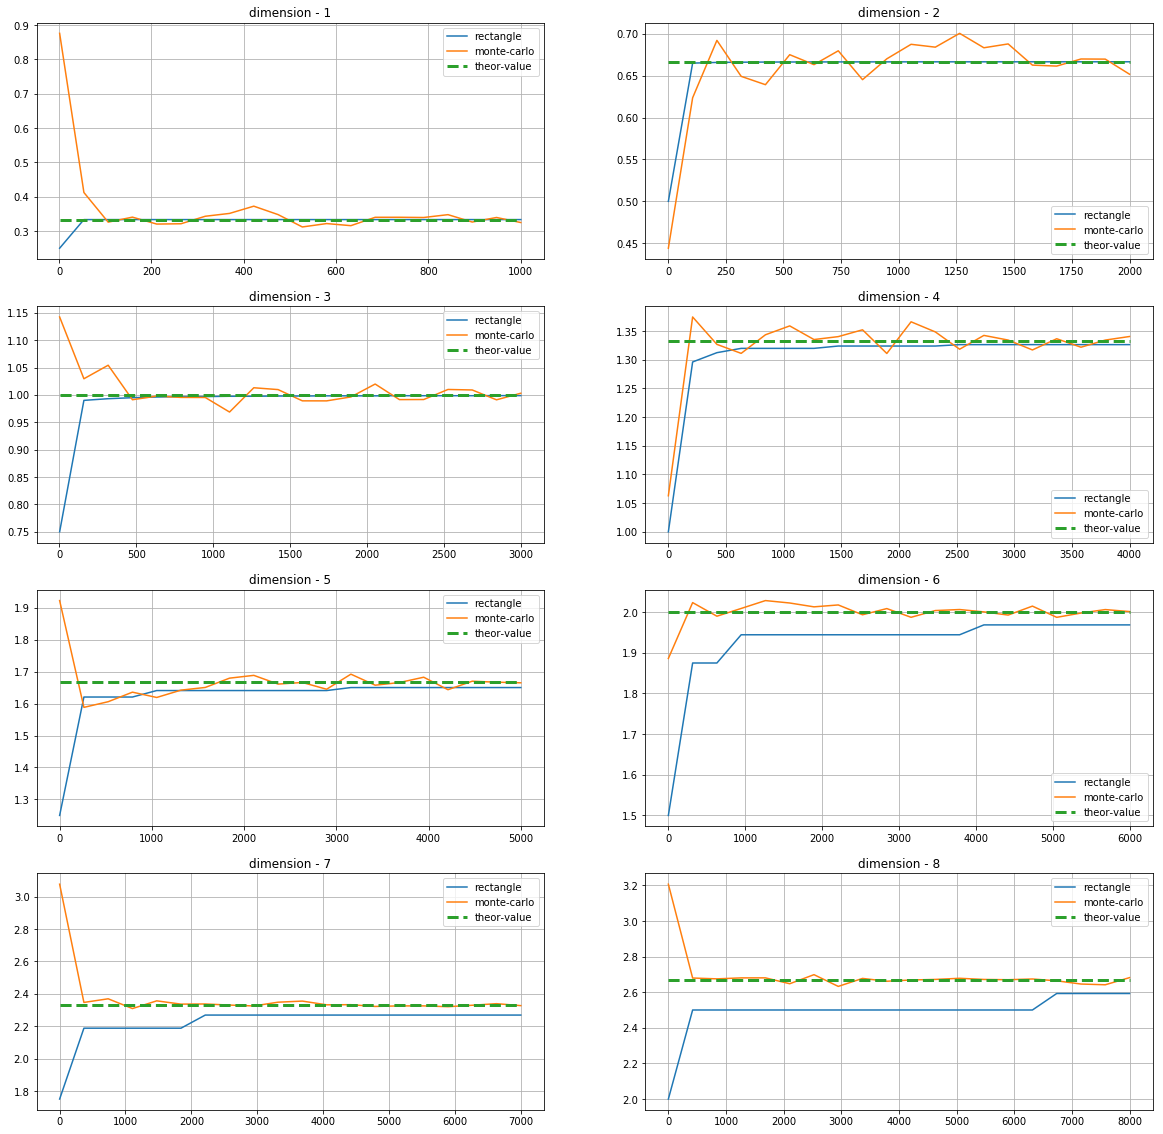

In [222]:
def plot_convergence(f, low, high, n_list, theoretical_value):
    """
    Строим графики сходимости.
    f - функция многих переменных, на вход принимает вектор;
    low - нижние границы (в том же порядке, в котором 
                          функция принимает аргументы);
    high - верхние границы (аналогично);
    n_list - список;
    theoretical_value - точное значение интеграла.
    """
    
    
    plt.subplot(4, 2, len(low))
    plt.title('dimension - {}'.format(len(low)))
    plt.plot(n_list, list(map(lambda n :Integrator.integrate(f, low, high, n, method='rectangle'), n_list)) 
            , label='rectangle')
    plt.plot(n_list, list(map(lambda n :Integrator.integrate(f, low, high, n, method='monte_carlo'), n_list)),
                label='monte-carlo')
    plt.plot(n_list, np.ones(shape=len(n_list))*theoretical_value, linestyle='--', lw=3, label='theor-value')
    plt.grid(True)
    plt.legend()    
   
    
    
     
    
plt.figure(figsize=(20, 20))
for d in range(1, 9):
    n_list = np.linspace(1, d*1000, 20)
    plot_convergence(lambda x: np.sum(x**2), np.zeros(d), np.ones(d), n_list, d/3.)

plt.show()

**Вывод:** При маленьких размерностях d, а именно $d \leq 3$ выгодней использовать метод прямоугольников, так как он сходится при меньших $n$, гораздо быстрее, чем метод монте-карло. А уже при больших размерностях монте-карло, наоборот сходится быстрее чем прямоугольниках, поэтому выгодней испольщовать как раз монте-карло

**Задача 4.** Вам предлагается численно вычислить многомерный интеграл Пуассона для $d=5$ и некоторой симметричной положительно определенной матрицы $A$, которую вы выберете сами. Зависит ли интеграл от выбора $A$? 
$$\int\limits_{\mathbb{R}^n} exp( - x^T A x) dx $$

Сравните результаты двух методов с истинным значением интеграла. Как вы думаете, какой метод выдает более точный результат? Количество итераций каждого метода должно быть не менее $10^6$.

In [267]:
A = np.diag([1, 2, 3, 3, 2])

print(Integrator.integrate(lambda x :np.exp(-x.T @ A @ x), (-6)*np.ones(5), 6*np.ones(5), 1000000, method = 'rectangle'))

print(Integrator.integrate(lambda x :np.exp(-x.T @ A @ x), (-6)*np.ones(5), 6*np.ones(5), 1000000, method = 'monte_carlo'))



2.9896068153024578
3.0427557671469567


In [264]:
np.pi**(2.5)/6

2.9155697212708103

**Комментарий:** Истинное значение $ \approx 2.91557$, Притом Монте-Карло $ \approx 3.042756$, а метод прямоугольников $ = 2.98961$. Я считал значения на $[-6, 6]^{5}$, так как в силу распределения, уже при $|x| \geq 3$, значения функции $exp( - x^T Diag([1, 2, 3, 3, 2]) x)$ уже будут крайне маленькими, меньше $10^{-6}$. Если брать большие пределы, то точность будет теряться, так как как в Монте-Карло, так и в методе прямоугольников мы выбираем точки на всем промежутке, доля точек, имеющих большие значения, будет мала(особенно характерно для Монте-Карло), поэтому результат будет ошибочным, выраждаться в ноль. 

Мне кажется, что лучше работает метод прямоугольников, так как у нас $n = 1000000$, и он уже успел близко сойтись к истинному значению, а метод монте-карло подвержен случайностям. 

Рассмотрим отношение интегралов $$F(t) = \frac{ \int\limits_{-\infty}^{t_1} ... \int\limits_{-\infty}^{t_k} exp \left( - \frac12 x^T A x \right) dx}{ \int\limits_{\mathbb{R}^n} exp \left( - \frac12 x^T A x \right) dx} $$
В чем его вероятностный смысл?

**Ответ:** $$F(t)  = \frac{ \int\limits_{-\infty}^{t_1} ... \int\limits_{-\infty}^{t_k} exp \left( - \frac12 x^T A x \right) dx}{ \int\limits_{\mathbb{R}^n} exp \left( - \frac12 x^T A x \right) dx}
= \frac{ \int\limits_{-\infty}^{t_1} ... \int\limits_{-\infty}^{t_k} exp \left( - \frac12 x^T A x \right) dx}{(2\pi)^\frac{n}{2}\frac{1}{\sqrt{detA}}} = 
 \frac{1}{(2\pi)^\frac{n}{2}\sqrt{detA^{-1}}}  \int\limits_{-\infty}^{t_1} ... \int\limits_{-\infty}^{t_k} exp \left( - \frac12 x^T A x \right) dx$$

Это функция распределения многомерного нормального распределения с нулевым мат ожиданием и матрицей ковариаций $A^{-1}$

**Задача 5.** В заключении рассмотрения метода Монте-Карло вам предлагается реальная практическая задача.

На основе http://ecsocman.hse.ru/data/819/759/1219/Monte_Karlo_dlya_analitikov.pdf
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются.



*Формулировка задачи от заказчика:*
Общая задача анализа --- основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $25$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи --- период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи --- период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ --- темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.2 (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{25} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> --- процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{25} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, normed=True)`.



Перечислим еще раз все *случайные параметры*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{25}$ --- темпы добычи из скважин --- независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{25}_{\text{скв.}}$ --- затраты на каждую скважину --- независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. (используйте `sps.triang(loc=90, c=1/3, scale=30)`)

*Фиксированные параметры*:
* $25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель --- стоимость нефти;
* $100$ тыс. баррелей --- объем добытой нефти за год, при котором разработка месторождения прекращается.
* $200$ млн. долларов в год --- затраты на месторождение.



In [195]:
# общая прибыль, без затрат
def income(k, q, i, t):
    inco = list(map(lambda x : 70*365*k*q*(np.exp(-0.2)/(1 + i))**(x-1), np.arange(1, t+1)) )
    return np.array(inco).sum()
    
vect_income = np.vectorize(income, signature='(),(),(),()->()')

In [196]:
k = sps.norm(loc=0.42, scale=0.012).rvs(100000)

q = sps.norm(loc=10, scale=3).rvs(size=(100000, 25))
q[q < 0] = 0
q = q.sum(axis=1)

i = sps.norm(loc=0.1, scale=0.012).rvs(100000)

C_borehole = sps.triang(loc=90, c=1/3, scale=30).rvs(size=(100000, 25)).sum(axis=1)

c = 70 # долларов

T = (5*(np.log(365*k*q) - np.log(100)) ).astype(int) + 2


In [197]:
NVP = vect_income(k, q*0.001, i, T) - T*2e2 - C_borehole

quantile = np.percentile(NVP, 10)
mean = NVP.mean()
probabily_if_positive = len(NVP[NVP > 0])/(len(NVP))

print('0.1 квантиль(в млн. долларах) : ', quantile)
print('среднее (в млн. долларах): ',mean)
print('P(NVP > 0) = ',  probabily_if_positive)

0.1 квантиль(в млн. долларах) :  743.8988624562139
среднее (в млн. долларах):  1684.3207236310548
P(NVP > 0) =  0.99368


/home/ilya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


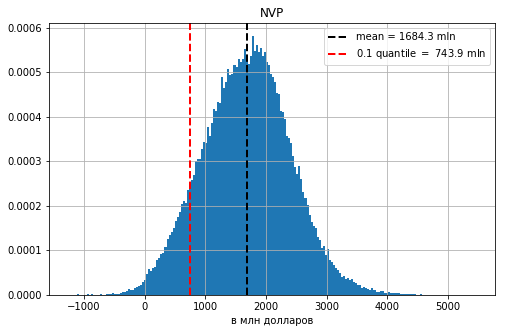

In [198]:
plt.figure(figsize=(8, 5))

plt.title('NVP')
plt.xlabel('в млн долларов')
plt.hist(NVP, bins=200, normed=True)

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, 
                                        label='mean = {} mln'.format(round(mean, 1)))
plt.axvline(quantile, color='red', linestyle='dashed', linewidth=2, 
                                        label='0.1 quantile $=$ {} mln'.format(round(quantile, 1)))
plt.grid(True)
plt.legend()

plt.show()

**Вывод:** 

В данной практической задаче с помощью метода Монте-Карло мы нашли распределение экономической величины - так называемой NVP, нашли ее среднее и ряд других величин, которые помогли нам в решении задачи. Отсюда можно сделать вывод, что Монте-Карло можно активно применять на практите, во многих экономических задачах, чтобы моделировать поведение некого необходимого нам параметра. 

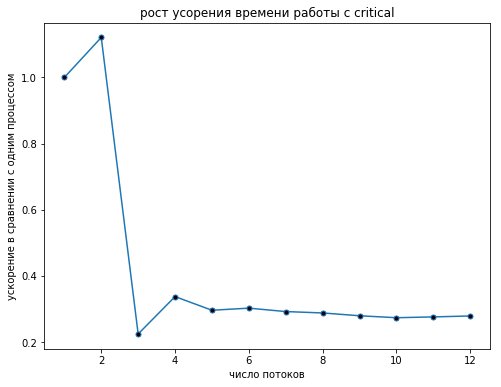

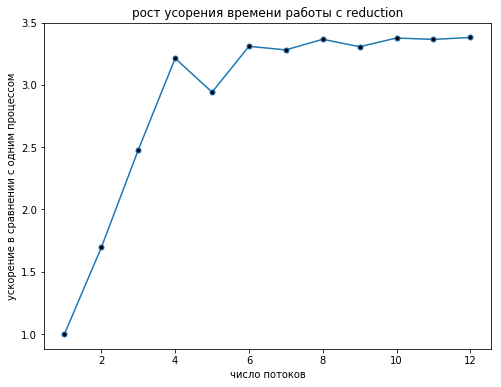

In [4]:
import matplotlib.pyplot as plt

def get_plot(times, title, filename):
    plt.figure(figsize=(8, 6))
    plt.xlabel("число потоков")
    plt.ylabel("ускорение в сравнении с одним процессом")
    plt.title(title)
    plt.plot(list(range(1, 13)), times, marker='.', markersize=10, 
             markerfacecolor='#0F000F')
    plt.savefig(filename)
    

line1 = "5.632508 5.025312 25.120900 16.701748 19.029778 18.632457 19.288884 19.573091 20.167344 20.601824 20.421669 20.211421"
line2 = "5.504671 3.247177 2.221770 1.713317 1.871763 1.663464 1.678036 1.635587 1.665175 1.630692 1.636014 1.628530"

times1 = line1.strip().split()
times2 = line2.strip().split()

st = float(times1[0]) 
for i in range(len(times1)):
    times1[i] = st/float(times1[i])

st = float(times2[0]) 
for i in range(len(times2)):
    times2[i] = st/float(times2[i])

get_plot(times1, "рост усорения времени работы с critical", "foo1.pdf")

get_plot(times2, "рост усорения времени работы с reduction", "foo2.pdf")

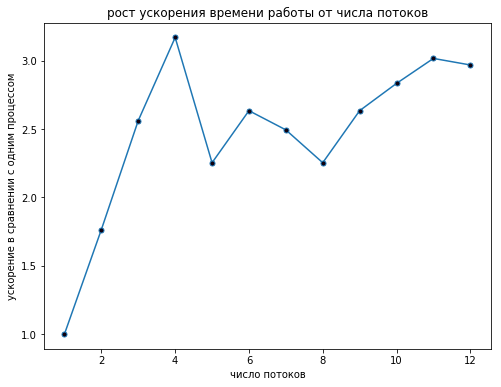

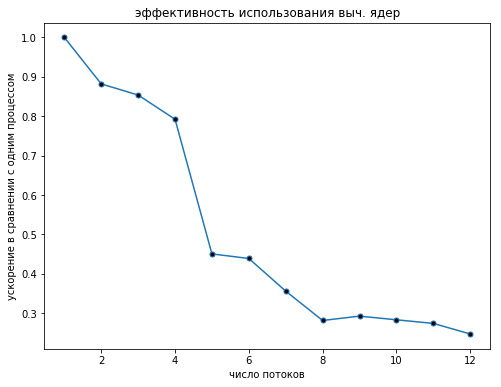

In [6]:
line1 = "0.187 0.106 0.073 0.059 0.083 0.071 0.075 0.083 0.071 0.066 0.062 0.063"

times1 = line1.strip().split()

accels = list()
es = list()

st = float(times1[0]) 
for i in range(len(times1)):
    accels.append(st/float(times1[i]))
    
for i in range(len(times1)):
    es.append(accels[i]/(i+1))

    
get_plot(accels, "рост ускорения времени работы от числа потоков", "foo1.pdf")

get_plot(es, "эффективность использования выч. ядер", "foo2.pdf")   